# 🌞 Solar Energy Prediction in India using Machine Learning

### ============================================================
### 📘 Section 1: Importing Libraries
### ============================================================

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### ============================================================
### 📗 Section 2: Load Dataset
### ============================================================

In [9]:
df = pd.read_csv('solar_energy_india_dataset.csv')
print("✅ Dataset Loaded Successfully!")
print("Dataset shape:", df.shape)
display(df.head())

✅ Dataset Loaded Successfully!
Dataset shape: (1000, 14)


,Date,Location,Latitude,Longitude,Temperature (°C),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),Precipitation (mm),Sunshine_Hours,Month,Season,Solar_Energy_Output (kWh)
0,2024-01-01,Kolkata,22.5726,88.3639,39.6,62.968984,3.43,895.9,34.384859,2.6,6.2,1,Winter,43.34
1,2024-01-02,Kolkata,22.5726,88.3639,33.6,27.812008,2.12,710.9,0.000000,1.9,7.6,1,Winter,35.13
2,2024-01-03,Ahmedabad,23.0225,72.5714,30.6,51.398821,4.69,664.3,0.000000,1.4,5.5,1,Winter,33.95
3,2024-01-04,Delhi,28.6139,77.2090,32.5,17.909663,3.45,641.1,23.502101,1.1,10.3,1,Winter,35.12
4,2024-01-05,Kolkata,22.5726,88.3639,24.9,50.909769,2.76,841.7,48.057567,0.2,7.5,1,Winter,43.66


### ============================================================
### 📊 Section 3: Data Preprocessing
### ============================================================

In [10]:
# Convert categorical features to numeric
df_encoded = pd.get_dummies(df, columns=['Location', 'Season'], drop_first=True)

# Define features and target
X = df_encoded.drop(['Solar_Energy_Output (kWh)', 'Date'], axis=1)
y = df_encoded['Solar_Energy_Output (kWh)']

# Split into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

Training Samples: 800, Testing Samples: 200


### ============================================================
### ⚙️ Section 4: Model Training
### ============================================================

In [11]:
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)
print("✅ Model training complete!")

✅ Model training complete!


### ============================================================
### 🔍 Section 5: Model Prediction and Evaluation
### ============================================================

In [12]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


📊 Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.028
Mean Squared Error (MSE): 1.522
Root Mean Squared Error (RMSE): 1.234
R² Score: 0.937


### ============================================================
### 📈 Section 6: Enhanced Visualization (Line Plot + Residuals)
### ============================================================

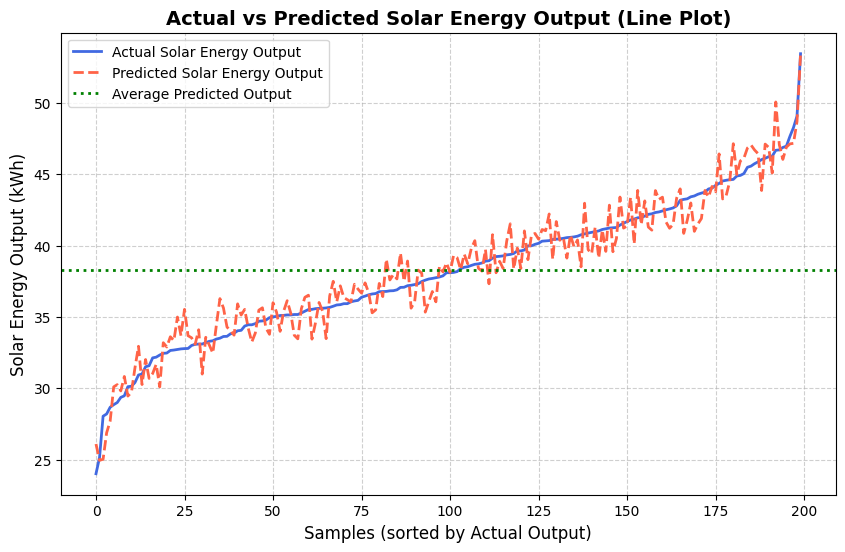

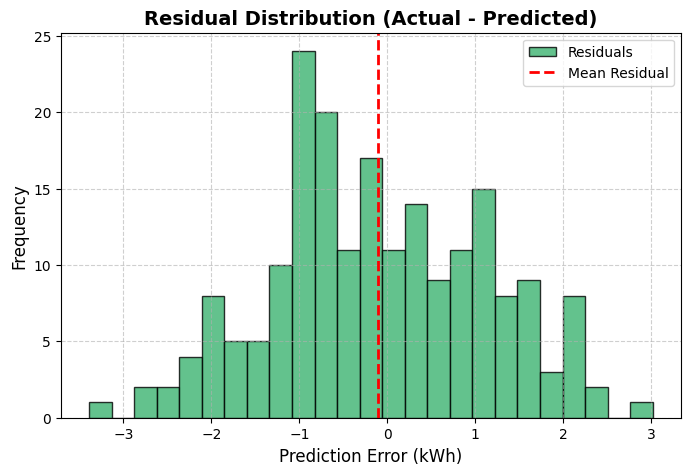

In [13]:
# Sort the test data for smoother visualization
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# --- Actual vs Predicted Line Plot ---
plt.figure(figsize=(10,6))

# Actual line
plt.plot(y_test_sorted, label='Actual Solar Energy Output', color='royalblue', linewidth=2)

# Predicted line
plt.plot(y_pred_sorted, label='Predicted Solar Energy Output', color='tomato',
         linestyle='--', linewidth=2)

# Optional average predicted line
plt.axhline(np.mean(y_pred_sorted), color='green', linestyle=':', linewidth=2,
            label='Average Predicted Output')

plt.title('Actual vs Predicted Solar Energy Output (Line Plot)', fontsize=14, weight='bold')
plt.xlabel('Samples (sorted by Actual Output)', fontsize=12)
plt.ylabel('Solar Energy Output (kWh)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Residual Distribution Plot ---
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=25, color='mediumseagreen', edgecolor='black', alpha=0.8, label='Residuals')
plt.axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label='Mean Residual')

plt.title('Residual Distribution (Actual - Predicted)', fontsize=14, weight='bold')
plt.xlabel('Prediction Error (kWh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### ============================================================
### 🔮 Section 7: Future Predictions
### ============================================================

In [14]:
# Select a few random test samples as future-like data
future_data = X_test.sample(10, random_state=42)
future_pred = model.predict(future_data)

future_df = pd.DataFrame({
    'Predicted_Energy (kWh)': future_pred
})
future_df.reset_index(drop=True, inplace=True)

print("\n🔮 Future Solar Energy Predictions (Sample):")
display(future_df)


🔮 Future Solar Energy Predictions (Sample):


,Predicted_Energy (kWh)
0,32.943267
1,33.080800
2,40.116000
3,34.291000
4,41.317333
5,41.126867
6,38.281400
7,43.509200
8,39.041000
9,43.868267


### ============================================================
### ✅ End of Notebook
### ============================================================

In [ ]:
print("\Notebook execution complete! 🚀")

\nNotebook execution complete! 🚀
